<a href="https://colab.research.google.com/github/jae-gyeong/marchine_learning_start/blob/master/19_09_30%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
! pip install mglearn

     |████████████████████████████████| 542kB 3.4MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582705 sha256=5a831a8f7b45235b526e66c088d2a7681e6cb63460f091a5c1749af96dfdee35
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


In [0]:
import mglearn

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
### 활성화 함수 - Sigmoid, ReLu, leaky ReLU, Tanh,,,

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
x = np.linspace(-5,5,300) #(-5~5까지 범위를 균일간격의 값으로 300개)
# step function
step_fnc = x.copy()
step_fnc[step_fnc <= 0 ] = 0
step_fnc[step_fnc > 0 ] = 1


# sigmoid function : 초기에 사용된 활성화 함수
sig_fnc = 1/(1+np.exp(-x))
  # 0~1사이값 나옴

# relu function : 0보다 작으면 0, 0보다 크면 비례하게 늘어남.
relu_fnc = np.maximum(x, 0) # 두개의 배열값 중 최대값 찾기


# tanh_fnc : 값의 범위가 -1 ~ 1 까지
tanh_fnc = np.tanh(x)


In [0]:
import numpy as np
import matplotlib 


In [0]:
# 음수 표기
matplotlib.rcParams['axes.unicode_minus'] = False

In [0]:
import matplotlib.pylab as plt

In [0]:
plt.rcParams['figure.figsize'] = (14,10)

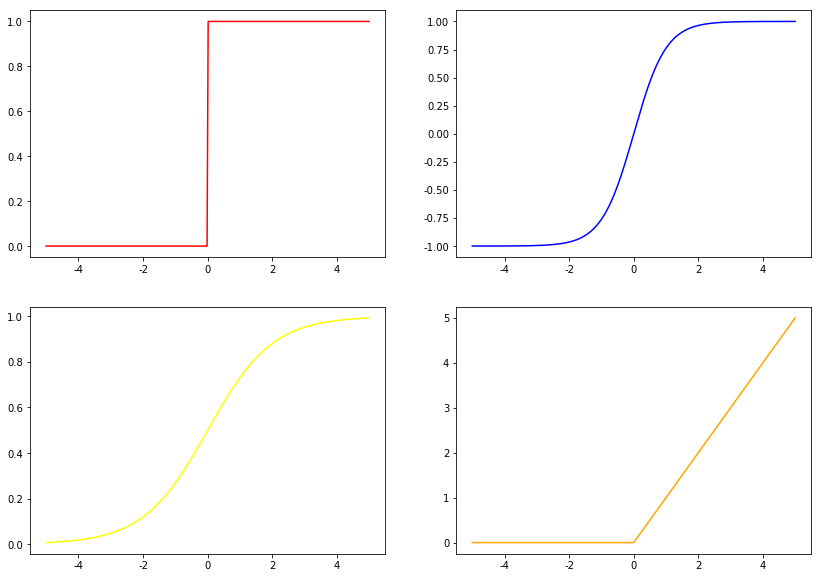

In [0]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
ax1.plot(x, step_fnc, color = 'red')
ax2.plot(x, tanh_fnc, color = 'blue')
ax3.plot(x, sig_fnc, color = 'yellow')
ax4.plot(x, relu_fnc, color = 'orange')

Text(0, 0.5, 'relu(x), tanh(x)')

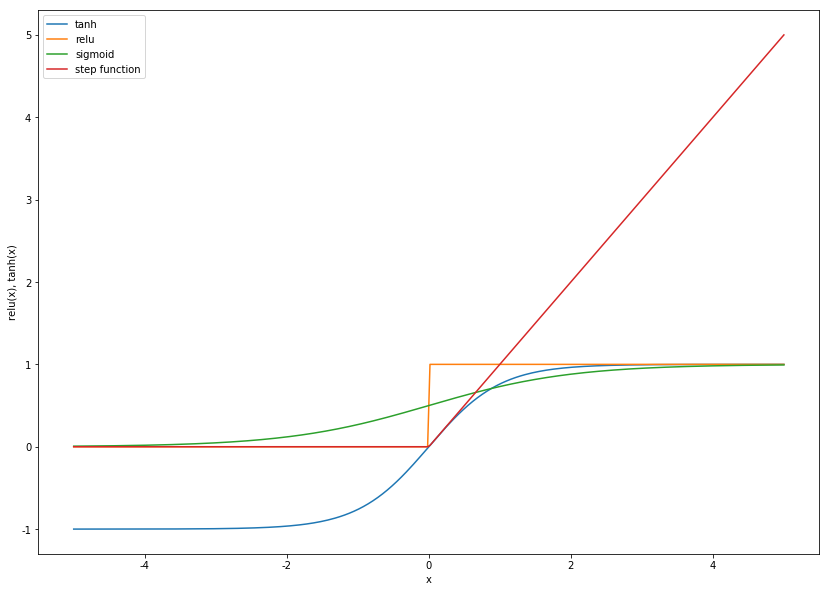

In [0]:
plt.plot(x, tanh_fnc, label='tanh')
plt.plot(x, step_fnc, label='relu')
plt.plot(x, sig_fnc, label='sigmoid')
plt.plot(x, relu_fnc, label='step function')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)')

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [0]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [0]:
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mlp


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

Text(0, 0.5, '특성 1')

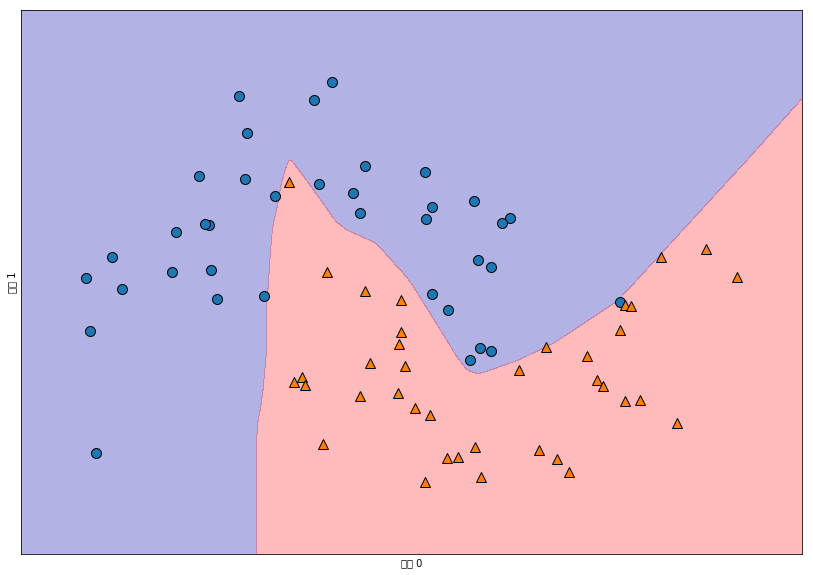

In [0]:
# 은닉 유닛이 100개인 신경망으로 학습시킨 two_moons의 데이터 셋의 결정 경계
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

신경망은 매우 비선형이지만 비교적 매끄러운 결정 경계를 만들었다.
은닉유닛이 100개는 작은 데이터에는 좀 큰 크기이다.은닉유닛을 줄여도 좋은 결과을 얻는다.


In [0]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mlp

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[10], learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

Text(0, 0.5, '특성 1')

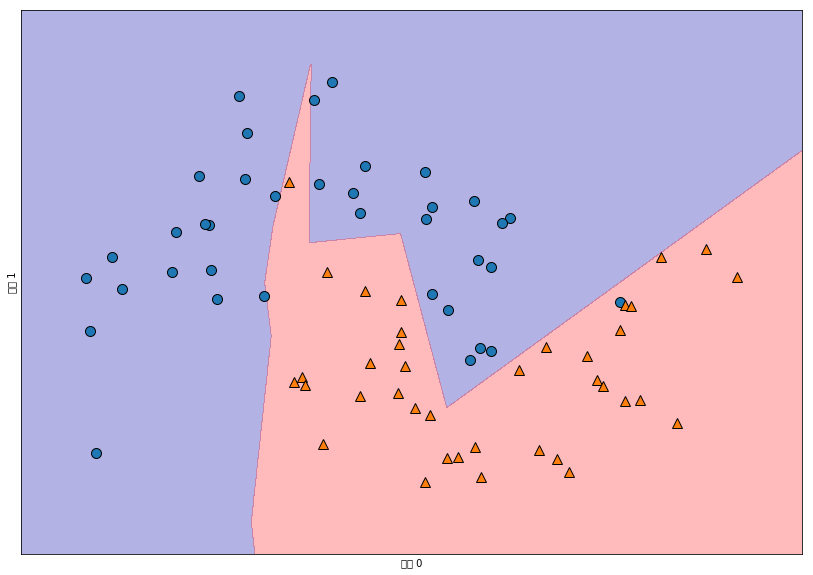

In [0]:
# 은닉 유닛이 10개인 신경망으로 학습시킨 two_moons의 데이터 셋의 결정 경계
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

약간 결정 경계 부분이 조금 더 날카로워짐.
은닉층이 하나이므로 결정 경계를 만드는 함수는 직선 10개가 합쳐져서 구성됨.
더 매끄러운 결정경계를 원한다면 은닉 유닛 추가, 은닉층 추가 또는 tanh함수 사용


Text(0, 0.5, '특성 1')

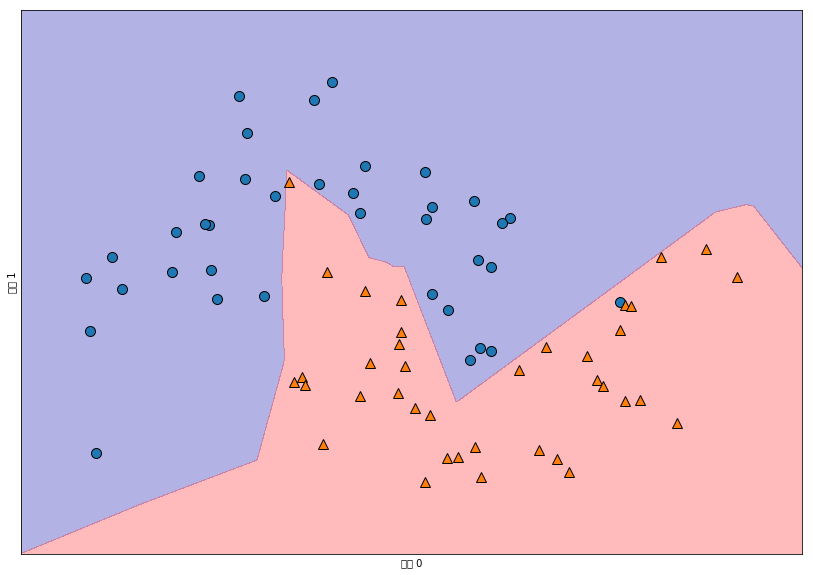

In [0]:
# 10개의 유닛으로 된 두개의 은닉층
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
# 은닉 유닛이 10개인 신경망으로 학습시킨 two_moons의 데이터 셋의 결정 경계
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0, 0.5, '특성 1')

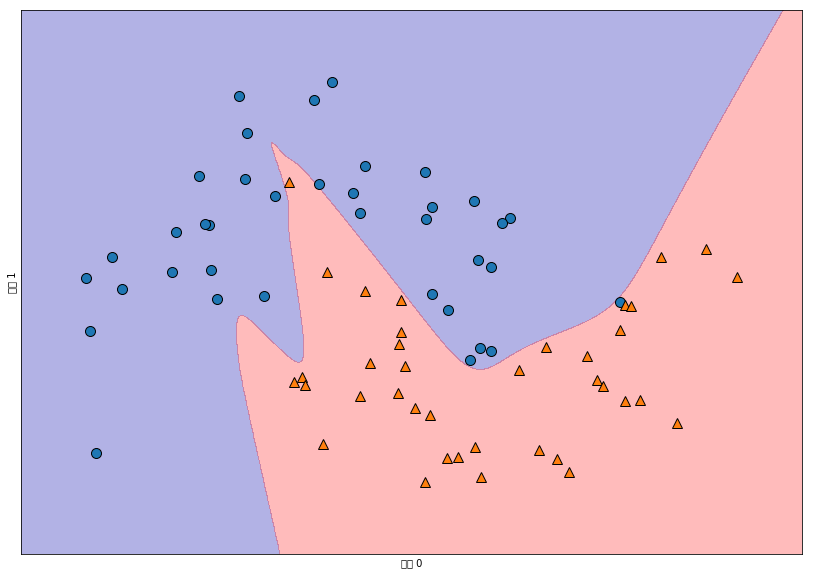

In [0]:
# tanh 함수 적용, 10개 유닛 두개의 은닉층
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
 random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
# 은닉 유닛이 10개인 신경망으로 학습시킨 two_moons의 데이터 셋의 결정 경계
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")